# Decision Tree


# Importar as bibliotecas e funções

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix # type: ignore

# Ler a base

In [3]:
df = pd.read_csv('Filtragem.csv')
df

,Id,Idade,Faixa idade,Gênero,Cor/raca/etnia,PCD,Vive no Brasil,Estado onde mora,UF onde mora,Região onde Mora,...,Qual sua situação atual de trabalho?,Setor,Numero de Funcionários,Cargo Atual,Nível,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,Existe faculdade no Estado
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,3,0,1,0,1,Minas Gerais (MG),9,Sudeste,...,Empregado (CLT),4,Acima de 3.000,3,2,4,4,2,0,1
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,3,0,1,0,1,Espírito Santo (ES),6,Sudeste,...,Empreendedor ou Empregado (CNPJ),4,de 101 a 500,0,1,12,4,4,0,0
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,4,1,0,0,1,São Paulo (SP),23,Sudeste,...,Empregado (CLT),4,Acima de 3.000,1,0,12,3,1,0,1
3,00v0az4g792svil00vn6y1kfm9hq8vy9,34,3,0,1,0,1,Minas Gerais (MG),9,Sudeste,...,Empreendedor ou Empregado (CNPJ),8,de 101 a 500,1,0,11,1,1,0,1
4,015qqbrh4rr015qje9gvkbsb7ti1n5df,30,3,0,1,0,1,Rio de Janeiro (RJ),17,Sudeste,...,Empreendedor ou Empregado (CNPJ),16,de 51 a 100,6,1,13,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,zwm2c16e32000c6iaswzwm2c1jv6swo0,36,4,1,4,0,1,São Paulo (SP),23,Sudeste,...,Empregado (CLT),19,de 101 a 500,1,1,12,4,2,0,1
2903,zws1zie6ro3he9ln337yufzws1zyj7nw,23,1,0,4,0,1,Goiás (GO),7,Centro-oeste,...,Empregado (CLT),18,de 51 a 100,1,0,9,1,4,0,0
2904,zxvrsh0xk8z95k76e63zxvrshjgyigq0,27,2,1,4,0,1,Espírito Santo (ES),6,Sudeste,...,Empregado (CLT),18,Acima de 3.000,5,1,13,4,2,0,0
2905,zy7hsey7pigk6d4a4zy7hsm7bh1vcozc,28,2,0,1,0,1,São Paulo (SP),23,Sudeste,...,Empregado (CLT),4,de 501 a 1.000,3,0,13,3,2,0,1


In [ ]:
df.dtypes

,0
Id,object
Idade,int64
Faixa idade,int64
Gênero,int64
Cor/raca/etnia,int64
PCD,int64
Vive no Brasil,int64
Estado onde mora,object
UF onde mora,int64
Região onde Mora,object


## Retiração das colunas Região e Estado onde mora


In [4]:
df = df.drop(['Região onde Mora'], axis = 'columns')
df = df.drop(['Estado onde mora'], axis = 'columns')

## Dropando coluna inútil

In [5]:
df = df.drop(['Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'], axis = 'columns')
df = df.drop(['Numero de Funcionários'], axis = 'columns')
df = df.drop(['Qual sua situação atual de trabalho?'], axis = 'columns')
df = df.drop(['Id'], axis = 'columns')

## Transformação dos gêneros em 0s e 1s

Masculino == 0
Feminino == 1

In [6]:
df['Gênero'] = df['Gênero'].replace({'Masculino': 0, 'Feminino': 1})
df['Gênero'] = df['Gênero'].replace({'Outro': 0, 'Prefiro não informar': 0})

## Transformação dos dados em ordem alfabética

In [7]:
df['Faixa idade'] = LabelEncoder().fit_transform(df['Faixa idade'])
#df['UF onde mora'] = LabelEncoder().fit_transform(df['UF onde mora'])
df['Área de Formação'] = LabelEncoder().fit_transform(df['Área de Formação'])
df['Setor'] = LabelEncoder().fit_transform(df['Setor'])
df['Cargo Atual'] = LabelEncoder().fit_transform(df['Cargo Atual'])
df['Faixa salarial'] = LabelEncoder().fit_transform(df['Faixa salarial'])
df['Quanto tempo de experiência na área de dados você tem?'] = LabelEncoder().fit_transform(df['Quanto tempo de experiência na área de dados você tem?'])
df['Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'] = LabelEncoder().fit_transform(df['Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'])
df['Cor/raca/etnia'] = LabelEncoder().fit_transform(df['Cor/raca/etnia'])


##Transformando o Nível de Ensino em números crescentes



*   Estudante - 0
*   Graduação - 1
*   Pós - 2
*   Mest - 3
*   Dout - 4

In [8]:
df['Nível de Ensino'] = df['Nível de Ensino'].replace({'Estudante de Graduação': 0, 'Graduação/Bacharelado': 1, 'Pós-graduação': 2, 'Mestrado': 3, 'Doutorado ou Phd': 4})

## Transformando o Nível em números crescentes


*   Junior - 0
*   Pleno - 1
*   Senior - 2




In [9]:
df['Nível'] = df['Nível'].replace({'Júnior': 0, 'Pleno': 1, 'Sênior': 2})

In [10]:
df

,Idade,Faixa idade,Gênero,Cor/raca/etnia,PCD,Vive no Brasil,UF onde mora,Nível de Ensino,Área de Formação,Setor,Cargo Atual,Nível,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Existe faculdade no Estado
0,31,3,0,1,0,1,9,4,2,4,3,2,4,4,2,1
1,30,3,0,1,0,1,6,1,2,4,0,1,12,4,4,0
2,37,4,1,0,0,1,23,1,2,4,1,0,12,3,1,1
3,34,3,0,1,0,1,9,4,3,8,1,0,11,1,1,1
4,30,3,0,1,0,1,17,0,2,16,6,1,13,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,36,4,1,4,0,1,23,2,3,19,1,1,12,4,2,1
2903,23,1,0,4,0,1,7,1,2,18,1,0,9,1,4,0
2904,27,2,1,4,0,1,6,1,7,18,5,1,13,4,2,0
2905,28,2,0,1,0,1,23,1,8,4,3,0,13,3,2,1


In [11]:
df.dtypes

,0
Idade,int64
Faixa idade,int64
Gênero,int64
Cor/raca/etnia,int64
PCD,int64
Vive no Brasil,int64
UF onde mora,int64
Nível de Ensino,int64
Área de Formação,int64
Setor,int64


## Separação em X e Y

In [23]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df.drop(columns=['Nível']), df['Nível'], test_size=0.25, random_state=42)

modelo = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.006, max_depth=5,
                       random_state=42)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.006, max_depth=5, random_state=42)

In [24]:
previsoesTeste = modelo.predict(X_teste)
previsoesTreino = modelo.predict(X_treino)

## Precisao Treino


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore
accuracy_score(y_treino,previsoesTreino)

0.7068807339449541

## Precisao Teste


In [28]:
accuracy_score(y_teste,previsoesTeste)

0.6781292984869326

## Matriz Treino

In [29]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_treino, previsoesTreino)

array([[460, 117,  14],
       [170, 513, 118],
       [ 15, 205, 568]])

## Matriz Teste

In [30]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoesTeste)

array([[140,  29,   2],
       [ 62, 169,  49],
       [ 10,  82, 184]])

## Visualização de Acertos do Teste


*   0 = Junior
*   1 = Pleno
*   2 = Senior

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7068807339449541

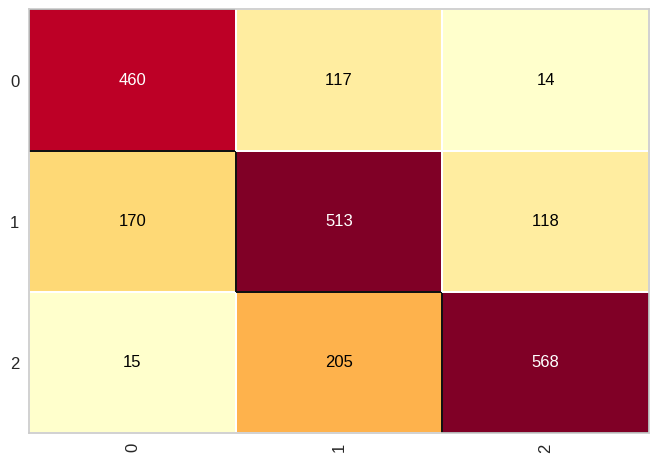

In [31]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_treino, y_treino)

## Visualização de Acertos do Teste



*   0 = Junior
*   1 = Pleno
*   2 = Senior

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6781292984869326

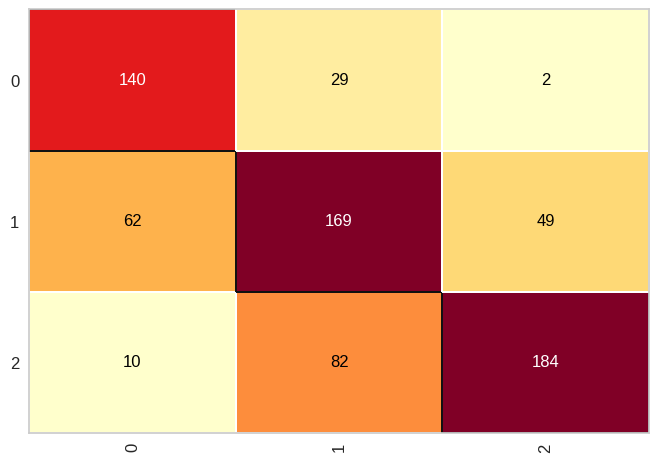

In [32]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

## Precision Treino

In [33]:
print(classification_report(y_treino, previsoesTreino))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       591
           1       0.61      0.64      0.63       801
           2       0.81      0.72      0.76       788

    accuracy                           0.71      2180
   macro avg       0.71      0.71      0.71      2180
weighted avg       0.71      0.71      0.71      2180



## Precision Teste

In [34]:
print(classification_report(y_teste, previsoesTeste))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       171
           1       0.60      0.60      0.60       280
           2       0.78      0.67      0.72       276

    accuracy                           0.68       727
   macro avg       0.68      0.70      0.68       727
weighted avg       0.69      0.68      0.68       727



## Importance

In [37]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Obtemos a importância das features
importancias = modelo.feature_importances_

# Associamos aos nomes das colunas
df_importancia = pd.DataFrame({
    'Feature': X_treino.columns,
    'Importância': importancias
})

# Ordenamos do mais importante para o menos
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Exibimos
print(df_importancia)

                                              Feature  Importância
12  Quanto tempo de experiência na área de dados v...     0.624513
11                                     Faixa salarial     0.338821
0                                               Idade     0.036666
3                                      Cor/raca/etnia     0.000000
4                                                 PCD     0.000000
1                                         Faixa idade     0.000000
2                                              Gênero     0.000000
6                                        UF onde mora     0.000000
5                                      Vive no Brasil     0.000000
7                                     Nível de Ensino     0.000000
8                                    Área de Formação     0.000000
10                                        Cargo Atual     0.000000
9                                               Setor     0.000000
13  Quanto tempo de experiência na área de TI/Enge...     0.00

## Grafico de Regras

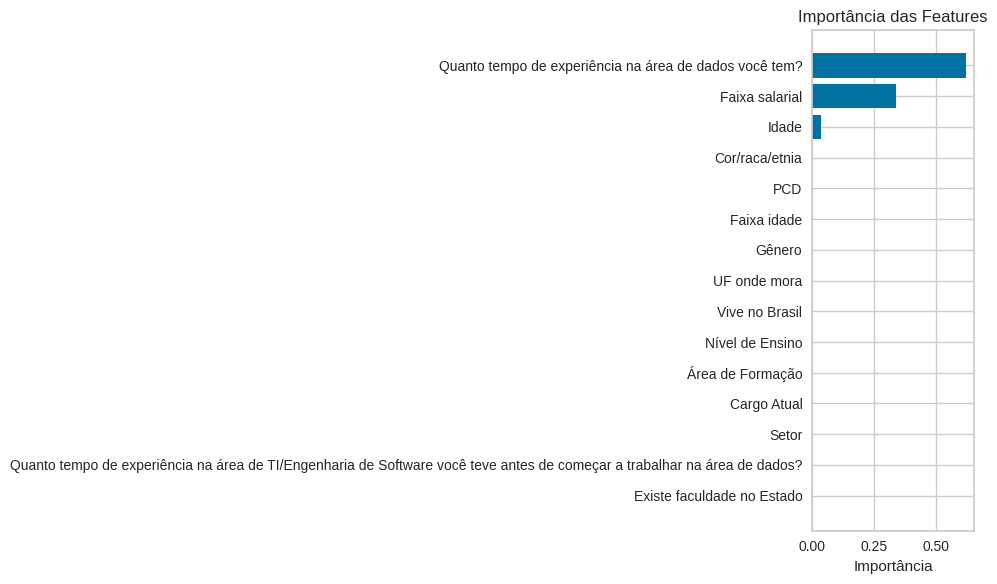

In [38]:

# Opcional: plotar em gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_importancia['Feature'], df_importancia['Importância'])
plt.gca().invert_yaxis()
plt.title("Importância das Features")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()

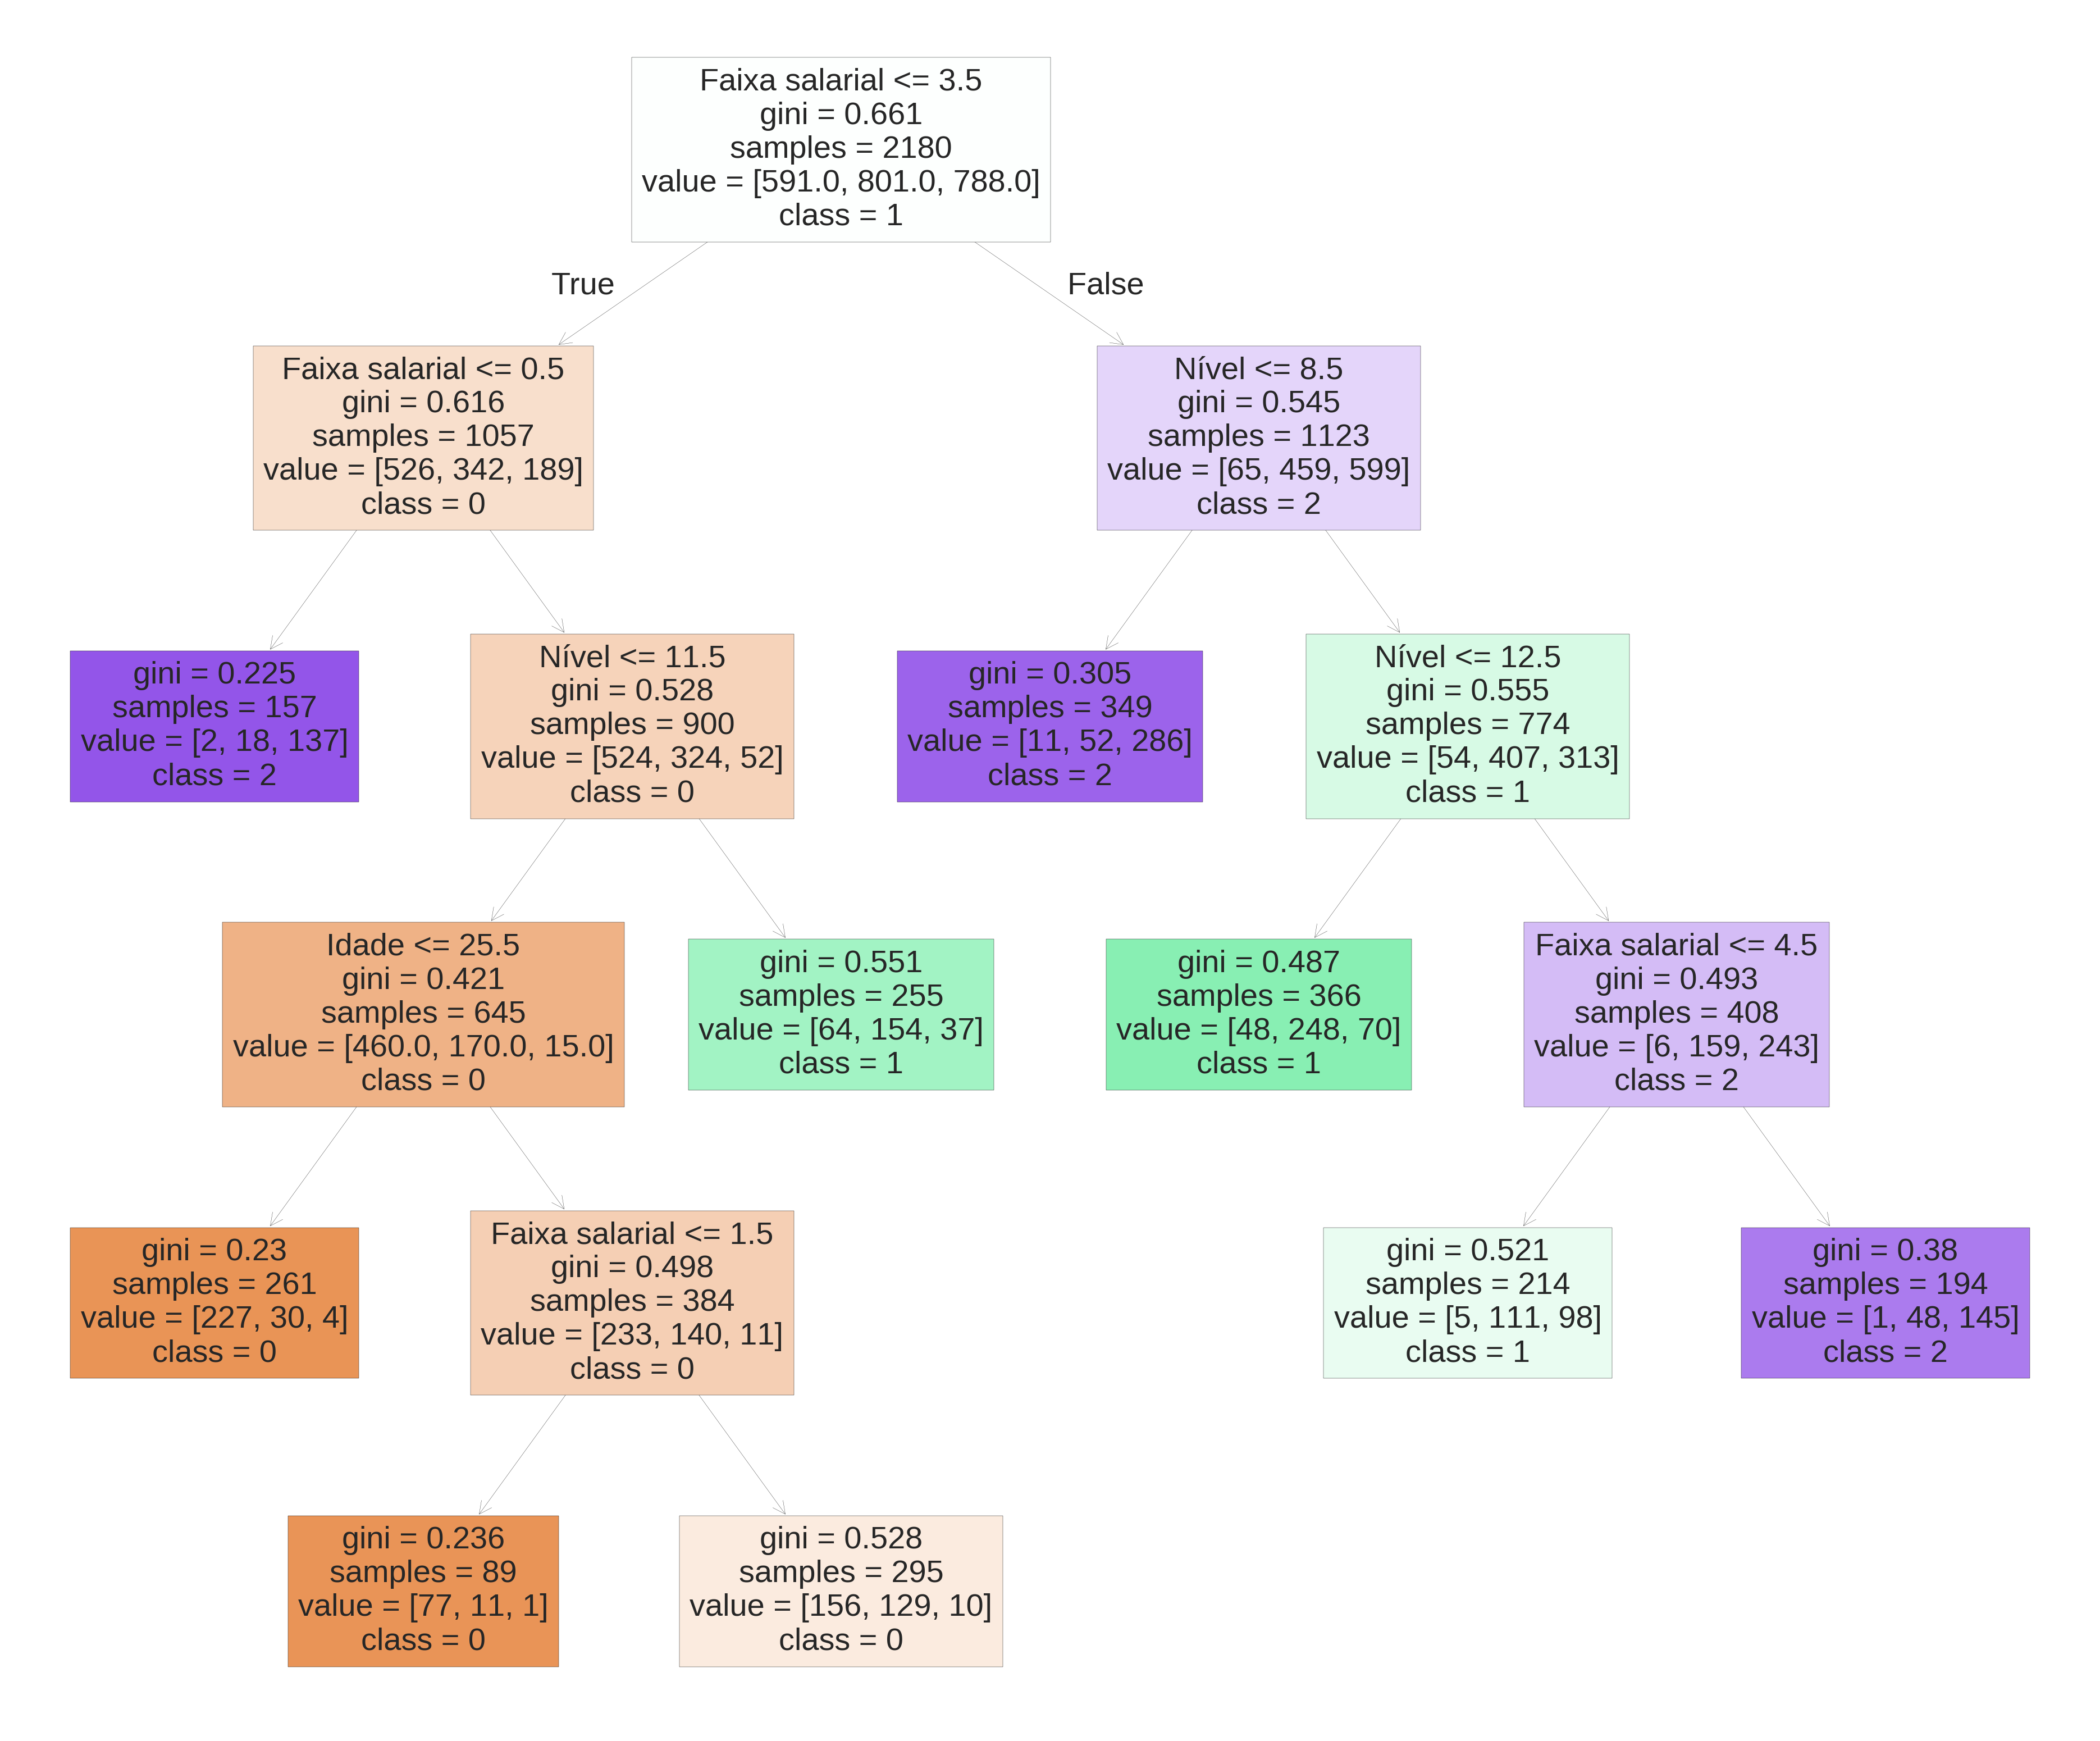

In [36]:
from sklearn import tree
import matplotlib.pyplot as plt
previsores = df.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(48,40))
tree.plot_tree(modelo, feature_names=previsores, class_names = ['0', '1', '2'], filled=True);
plt.savefig("modelo_arvore.png", dpi=600)

In [ ]:
from google.colab import files
df.to_csv('Filtragem_Transformada.csv', index=False)  # Salva o DataFrame modificado
files.download('Filtragem_Transformada.csv')          # Faz o download do arquivo atualizado

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>